# 1.1 Narcissism

In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

I keep some data frames in CSV format accessible from my website. One of them is called `personality.csv` and has, as you might imagine, personality variables. In this case, we will compare the narcissism levels based upon the grouping variable of biological sex.

In [2]:
pers = Table.read_table('http://faculty.ung.edu/rsinn/personality.csv')
pers.num_rows

165

In [3]:
pers.labels

('Age',
 'Yr',
 'Sex',
 'G21',
 'Corps',
 'Res',
 'Greek',
 'VarsAth',
 'Honor',
 'GPA',
 'Sleep',
 'Caff',
 'SitClass',
 'AccDate',
 'Friends',
 'TxRel',
 'Stress1',
 'Stress2',
 'CHS',
 'Thrill',
 'Eat',
 'TypeA',
 'Anx',
 'Opt',
 'SE',
 'Neuro',
 'Perf',
 'OCD',
 'Play',
 'Extro',
 'Narc',
 'HSAF',
 'HSSE',
 'HSAG',
 'HSSD',
 'PHS')

In [4]:
pers

Age,Yr,Sex,G21,Corps,Res,Greek,VarsAth,Honor,GPA,Sleep,Caff,SitClass,AccDate,Friends,TxRel,Stress1,Stress2,CHS,Thrill,Eat,TypeA,Anx,Opt,SE,Neuro,Perf,OCD,Play,Extro,Narc,HSAF,HSSE,HSAG,HSSD,PHS
22,4,M,Y,N,2,N,Y,N,3.01,5,1,M,N,E,22,17,18,33,23,13,30,25,26,62,34,104,11,143,10,9,51,54,46,21,AG
19,2,F,N,N,1,N,N,N,3.75,7.5,0,M,N,E,28,9,7,20,15,21,28,28,21,65,41,99,11,141,14,3,44,35,19,17,AF
23,1,F,Y,N,1,N,N,N,3.2,8.5,2,F,Y,S,24,11,13,27,14,39,29,27,19,65,28,86,6,98,7,2,31,36,21,19,SE
19,3,F,N,N,2,Y,N,N,4,6,2,F,N,S,27,15,14,26,13,45,28,33,24,63,30,118,3,121,8,4,34,36,30,33,SD
22,4,M,Y,Y,3,Y,N,Y,3.42,6,3,B,Y,S,20,9,9,32,16,32,30,29,18,41,47,103,9,124,6,4,50,42,37,34,AG
18,1,F,N,N,3,N,N,N,3.7,2.5,1,F,Y,E,21,16,15,25,18,32,30,46,19,48,53,113,16,131,6,2,33,32,29,33,SD
19,2,M,N,N,3,N,N,N,2.8,7,0,B,N,E,23,13,15,25,15,19,nan,nan,nan,nan,nan,105,16,121,5,5,nan,nan,nan,nan,nan
20,3,M,N,Y,1,Y,N,N,3.34,6.5,3,B,N,E,29,12,10,21,18,32,32,30,23,62,23,95,4,104,11,6,35,32,30,32,SD
21,3,F,Y,N,2,Y,N,N,3.47,5.5,2,F,Y,E,19,18,16,8,18,18,25,42,18,57,70,126,9,128,9,nan,20,23,19,25,SD
24,2,F,Y,Y,3,N,N,N,2.05,2.5,0,F,Y,E,25,17,17,22,30,40,30,36,18,55,50,107,14,108,9,8,31,32,33,32,AG


In [5]:
narc = pers.select('Sex','Narc')

The `nan` value indicates there is no value for that cell in the table. In this case, it's a survey item that went unanswered. The `numpy` function `nanmean` takes the average but ignores any `nan` values. In a clean table, we could just use `np.mean`, instead.

In [6]:
narc.group('Sex', np.nanmean)

Sex,Narc nanmean
F,3.81176
M,5.57143


C:\Users\robbs\anaconda3\envs\datasci\lib\site-packages\datascience\tables.py:920: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array(tuple(values))


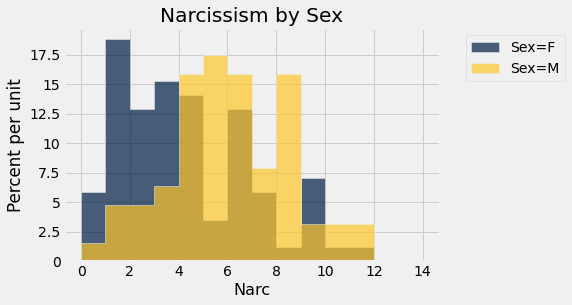

In [7]:
integer_bins = np.arange(15)
narc.hist('Narc', group = "Sex", bins = integer_bins)
_=plots.title('Narcissism by Sex')

In [8]:
males_narcissism = narc.where('Sex',"M").column('Narc')

In [9]:
females_narcissism = narc.where('Sex',"F").column('Narc')

In [10]:
print('The average narcissism level for males is',
      np.round(np.nanmean(males_narcissism),2),
      "\r\n",
      'and the average narcissism level for females is', 
      np.round(np.nanmean(females_narcissism),2)
     )

The average narcissism level for males is 5.57 
 and the average narcissism level for females is 3.81


In [11]:
from scipy import stats

In [12]:
stats.ttest_ind(males_narcissism, females_narcissism, axis=0, 
                equal_var=True, 
                nan_policy='omit', 
                alternative='two-sided')

Ttest_indResult(statistic=4.043565981367274, pvalue=8.492076949117668e-05)